In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

In [3]:
galton_data = pd.read_csv("/content/drive/MyDrive/데베응용-오성팀/코랩 노트북/data/Galtons_Height_Data_898.csv")
korean_data0 = pd.read_csv("/content/drive/MyDrive/데베응용-오성팀/코랩 노트북/data/output_2_23.csv")
korean_data1 = pd.read_csv("/content/drive/MyDrive/데베응용-오성팀/코랩 노트북/data/6조_My Family Height Data(11명).csv")
korean_data2 = pd.read_csv("/content/drive/MyDrive/데베응용-오성팀/코랩 노트북/data/가능충_My Family Height Data(67명).csv")
korean_data3 = pd.read_csv("/content/drive/MyDrive/데베응용-오성팀/코랩 노트북/data/설명가능한db조_My Family height data(42명).csv")
korean_data4 = pd.read_csv("/content/drive/MyDrive/데베응용-오성팀/코랩 노트북/data/설명불가능_My Family Height Data(277명).csv")

In [ ]:
korean_data0.head()

,Family,Father,Mother,Gender,Height,Kids,Father(cm),mother(cm),Height(cm)
0,1,69.7,61.0,M,68.1,2,177.0,155.0,173.0
1,1,69.7,61.0,M,67.3,2,177.0,155.0,171.0
2,2,68.5,63.0,M,68.1,2,174.0,160.0,173.0
3,2,68.5,63.0,M,67.7,2,174.0,160.0,172.0
4,3,68.5,64.6,M,67.7,1,174.0,164.0,172.0


In [ ]:
korean_data1.head()

,Family,Father,Mother,Gender,Height,Kids,Father(cm),mother(cm),Height(cm)
0,1,NaN,NaN,M,NaN,2,171,162,177
1,1,NaN,NaN,F,NaN,2,171,162,165
2,2,NaN,NaN,M,NaN,2,173,158,177
3,2,NaN,NaN,M,NaN,2,173,158,175
4,3,NaN,NaN,M,NaN,2,168,160,170


In [ ]:
korean_data2.head()

,Family,Father,Mother,Gender,Height,Kids,Father(cm),mother(cm),Height(cm)
0,1,65.7,63.0,F,62.2,1,167,160,158
1,2,65.7,63.4,M,66.9,2,167,161,170
2,2,65.7,63.4,F,63.8,2,167,161,162
3,3,65.7,59.1,F,65.0,3,167,150,165
4,3,65.7,59.1,M,67.3,3,167,150,171


In [ ]:
korean_data3.head()

,Family,Gender,Kids,Father(cm),mother(cm),Height(cm)
0,1,M,2,170,156,179
1,1,F,2,170,156,158
2,2,M,2,170,171,180
3,2,F,2,170,171,173
4,3,F,1,180,165,169


In [ ]:
korean_data4.head()

,Family,Kids,Father(cm),mother(cm),Gender,Height(cm)
0,1,2,178,164,M,185
1,1,2,178,164,F,158
2,2,2,177,160,M,175
3,2,2,177,160,M,178
4,3,2,174,160,F,166


## Korean data들 탐색  
data들마다 column들이 달라 일부는 csv 열고 수동으로 column 이름 바꿔줬음.

In [4]:
korean_data = pd.concat([korean_data0, korean_data1, korean_data2, korean_data3, korean_data4], ignore_index=True)
korean_data.head()

,Family,Father,Mother,Gender,Height,Kids,Father(cm),mother(cm),Height(cm)
0,1,69.7,61.0,M,68.1,2,177.0,155.0,173.0
1,1,69.7,61.0,M,67.3,2,177.0,155.0,171.0
2,2,68.5,63.0,M,68.1,2,174.0,160.0,173.0
3,2,68.5,63.0,M,67.7,2,174.0,160.0,172.0
4,3,68.5,64.6,M,67.7,1,174.0,164.0,172.0


In [ ]:
korean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 591 entries, 0 to 590
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Family      591 non-null    int64  
 1   Father      261 non-null    float64
 2   Mother      261 non-null    float64
 3   Gender      591 non-null    object 
 4   Height      261 non-null    float64
 5   Kids        591 non-null    int64  
 6   Father(cm)  591 non-null    float64
 7   mother(cm)  591 non-null    float64
 8   Height(cm)  591 non-null    float64
dtypes: float64(6), int64(2), object(1)
memory usage: 41.7+ KB


### 일부 데이터에 없는 column들(Father, Mother, Height)과 불필요한 column(Family)는 제외시킴. 

In [5]:
korean_data = korean_data.drop(['Family', 'Father', 'Mother', 'Height'], axis=1)
korean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 591 entries, 0 to 590
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      591 non-null    object 
 1   Kids        591 non-null    int64  
 2   Father(cm)  591 non-null    float64
 3   mother(cm)  591 non-null    float64
 4   Height(cm)  591 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 23.2+ KB


### Gender 항목을 M, F 두개의 Column으로 one-hot encoding 적용

In [6]:
gender = pd.get_dummies(korean_data.Gender)
korean_data = pd.concat([gender, korean_data], axis=1)
korean_data = korean_data.drop(['Gender'], axis=1)
korean_data

,F,M,Kids,Father(cm),mother(cm),Height(cm)
0,0,1,2,177.0,155.0,173.0
1,0,1,2,177.0,155.0,171.0
2,0,1,2,174.0,160.0,173.0
3,0,1,2,174.0,160.0,172.0
4,0,1,1,174.0,164.0,172.0
...,...,...,...,...,...,...
586,0,1,2,170.0,170.0,174.0
587,0,1,2,170.0,170.0,184.0
588,1,0,1,181.0,168.0,168.0
589,1,0,2,171.0,154.0,160.0


In [ ]:
korean_data.describe()

,F,M,Kids,Father(cm),mother(cm),Height(cm)
count,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000
mean,0.495770,0.504230,2.187817,172.977056,160.124704,169.380491
std,0.500406,0.500406,0.624571,5.282973,4.931358,8.641992
min,0.000000,0.000000,1.000000,157.000000,143.200000,150.000000
25%,0.000000,0.000000,2.000000,170.000000,157.000000,162.000000
50%,0.000000,1.000000,2.000000,173.000000,160.000000,170.000000
75%,1.000000,1.000000,2.500000,177.000000,164.000000,176.715000
max,1.000000,1.000000,5.000000,188.000000,176.000000,190.000000


In [ ]:
korean_data[korean_data['F']==1].describe()

,F,M,Kids,Father(cm),mother(cm),Height(cm)
count,293.0,293.0,293.000000,293.000000,293.000000,293.000000
mean,1.0,0.0,2.290102,173.076519,159.571502,162.471468
std,0.0,0.0,0.657781,5.290357,4.818225,5.252941
min,1.0,0.0,1.000000,157.000000,148.000000,150.000000
25%,1.0,0.0,2.000000,170.000000,156.000000,159.000000
50%,1.0,0.0,2.000000,173.000000,160.000000,162.000000
75%,1.0,0.0,3.000000,176.000000,163.000000,166.000000
max,1.0,0.0,5.000000,188.000000,171.000000,181.000000


In [ ]:
korean_data[korean_data['M']==1].describe()

,F,M,Kids,Father(cm),mother(cm),Height(cm)
count,298.0,298.0,298.000000,298.000000,298.000000,298.000000
mean,0.0,1.0,2.087248,172.879262,160.668624,176.173591
std,0.0,0.0,0.573640,5.282769,4.988573,5.276367
min,0.0,1.0,1.000000,157.000000,143.200000,160.000000
25%,0.0,1.0,2.000000,169.700000,157.000000,173.000000
50%,0.0,1.0,2.000000,173.000000,160.000000,176.250000
75%,0.0,1.0,2.000000,177.000000,164.750000,179.225000
max,0.0,1.0,5.000000,188.000000,176.000000,190.000000


## Galton 데이터 탐색

In [ ]:
galton_data.head()

,Family,Father,Mother,Gender,Height,Kids,Father(cm),mother(cm),Height(cm)
0,1,78.5,67.0,M,73.2,4,199.39,170.18,185.928
1,1,78.5,67.0,F,69.2,4,199.39,170.18,175.768
2,1,78.5,67.0,F,69.0,4,199.39,170.18,175.260
3,1,78.5,67.0,F,69.0,4,199.39,170.18,175.260
4,2,75.5,66.5,M,73.5,4,191.77,168.91,186.690


In [7]:
# 안쓰는 columns 없애고 Gender one-hot encoding
galton_data = galton_data.drop(['Family', 'Father', 'Mother', 'Height'], axis=1)
gender = pd.get_dummies(galton_data.Gender)
galton_data = pd.concat([gender, galton_data], axis=1)
galton_data = galton_data.drop(['Gender'], axis=1)
galton_data

,F,M,Kids,Father(cm),mother(cm),Height(cm)
0,0,1,4,199.39,170.18,185.928
1,1,0,4,199.39,170.18,175.768
2,1,0,4,199.39,170.18,175.260
3,1,0,4,199.39,170.18,175.260
4,0,1,4,191.77,168.91,186.690
...,...,...,...,...,...,...
893,0,1,8,173.99,165.10,173.990
894,0,1,8,173.99,165.10,171.958
895,1,0,8,173.99,165.10,162.560
896,1,0,8,173.99,165.10,161.290


In [ ]:
galton_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   F           898 non-null    uint8  
 1   M           898 non-null    uint8  
 2   Kids        898 non-null    int64  
 3   Father(cm)  898 non-null    float64
 4   mother(cm)  898 non-null    float64
 5   Height(cm)  898 non-null    float64
dtypes: float64(3), int64(1), uint8(2)
memory usage: 29.9 KB


In [ ]:
galton_data.describe()

,F,M,Kids,Father(cm),mother(cm),Height(cm)
count,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000
mean,0.482183,0.517817,6.135857,175.851441,162.774401,169.572154
std,0.499961,0.499961,2.685156,6.274450,5.859844,9.100613
min,0.000000,0.000000,1.000000,157.480000,147.320000,142.240000
25%,0.000000,0.000000,4.000000,172.720000,160.020000,162.560000
50%,0.000000,1.000000,6.000000,175.260000,162.560000,168.910000
75%,1.000000,1.000000,8.000000,180.340000,166.370000,177.038000
max,1.000000,1.000000,15.000000,199.390000,179.070000,200.660000


In [ ]:
galton_data[galton_data['F']==1].describe()

,F,M,Kids,Father(cm),mother(cm),Height(cm)
count,433.0,433.0,433.000000,433.000000,433.000000,433.000000
mean,1.0,0.0,6.311778,176.027866,162.990568,162.839811
std,0.0,0.0,2.722892,6.710421,5.783625,6.020612
min,1.0,0.0,1.000000,157.480000,147.320000,142.240000
25%,1.0,0.0,4.000000,172.720000,160.020000,158.750000
50%,1.0,0.0,6.000000,175.768000,162.560000,162.560000
75%,1.0,0.0,8.000000,180.340000,166.370000,166.370000
max,1.0,0.0,15.000000,199.390000,179.070000,179.070000


In [ ]:
galton_data[galton_data['M']==1].describe()

,F,M,Kids,Father(cm),mother(cm),Height(cm)
count,465.0,465.0,465.000000,465.000000,465.000000,465.000000
mean,0.0,1.0,5.972043,175.687157,162.573110,175.841196
std,0.0,0.0,2.641935,5.841820,5.929065,6.684249
min,0.0,1.0,1.000000,157.480000,147.320000,152.400000
25%,0.0,1.0,4.000000,172.720000,160.020000,171.450000
50%,0.0,1.0,6.000000,175.260000,162.560000,175.768000
75%,0.0,1.0,8.000000,179.070000,166.370000,180.340000
max,0.0,1.0,15.000000,199.390000,179.070000,200.660000


## Galton data와 Korean data 합친 height_data 생성

In [8]:
height_data = pd.concat([korean_data, galton_data], ignore_index=True)
height_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1489 entries, 0 to 1488
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   F           1489 non-null   uint8  
 1   M           1489 non-null   uint8  
 2   Kids        1489 non-null   int64  
 3   Father(cm)  1489 non-null   float64
 4   mother(cm)  1489 non-null   float64
 5   Height(cm)  1489 non-null   float64
dtypes: float64(3), int64(1), uint8(2)
memory usage: 49.6 KB


In [ ]:
height_data.describe()

,F,M,Kids,Father(cm),mother(cm),Height(cm)
count,1489.000000,1489.000000,1489.000000,1489.000000,1489.000000,1489.000000
mean,0.487576,0.512424,4.568838,174.710567,161.722708,169.496081
std,0.500014,0.500014,2.869612,6.064469,5.658945,8.918962
min,0.000000,0.000000,1.000000,157.000000,143.200000,142.240000
25%,0.000000,0.000000,2.000000,170.180000,158.000000,162.560000
50%,0.000000,1.000000,4.000000,175.000000,162.000000,169.418000
75%,1.000000,1.000000,7.000000,178.000000,165.100000,177.000000
max,1.000000,1.000000,15.000000,199.390000,179.070000,200.660000


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

Text(0.5, 1.0, 'Galton vs Korean - Male')

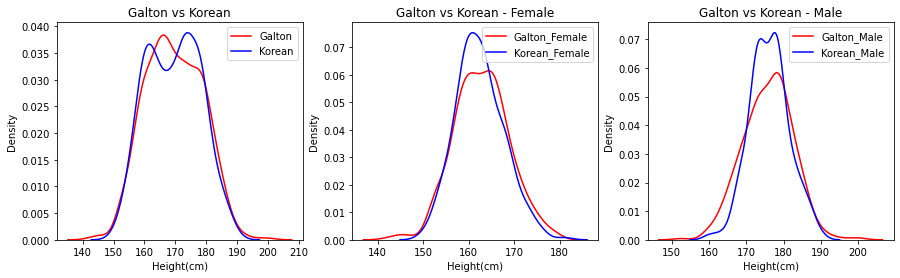

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

ax0 = sns.distplot(galton_data['Height(cm)'], label='Galton' , hist=False, ax=axes[0], color='r')
ax0 = sns.distplot(korean_data['Height(cm)'], label='Korean' , hist=False, ax=axes[0], color='b')

ax1 = sns.distplot(galton_data[galton_data['F'] == 1]['Height(cm)'], label='Galton_Female' , hist=False, ax=axes[1], color='r')
ax1 = sns.distplot(korean_data[korean_data['F'] == 1]['Height(cm)'], label='Korean_Female' , hist=False, ax=axes[1], color='b')

ax2 = sns.distplot(galton_data[galton_data['M'] == 1]['Height(cm)'], label='Galton_Male' , hist=False, ax=axes[2], color='r')
ax2 = sns.distplot(korean_data[korean_data['M'] == 1]['Height(cm)'], label='Korean_Male' , hist=False, ax=axes[2], color='b')

ax0.legend()
ax0.set_title('Galton vs Korean')

ax1.legend()
ax1.set_title('Galton vs Korean - Female')

ax2.legend()
ax2.set_title('Galton vs Korean - Male')

### 전체 height data를 대상으로 한 pairplot

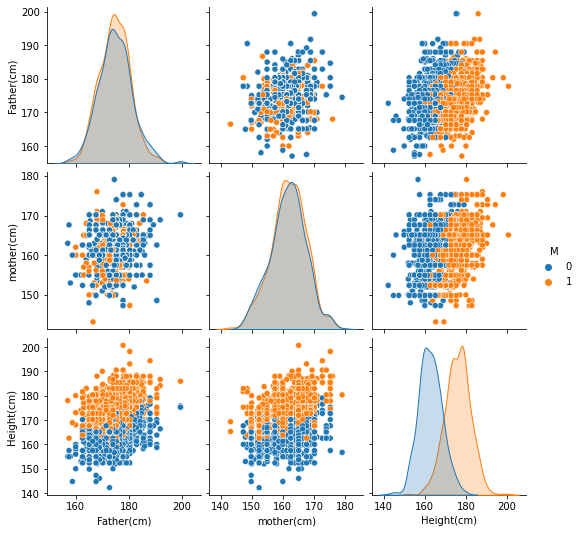

In [ ]:
sns.pairplot(
    height_data,
    x_vars=["Father(cm)", "mother(cm)", "Height(cm)"],
    y_vars=["Father(cm)", "mother(cm)", "Height(cm)"],
    hue="M"
)

### 자녀 키에 따른 부모 키. 파랑 - Father, 주황 - Mother



Text(0, 0.5, 'Parents Height')

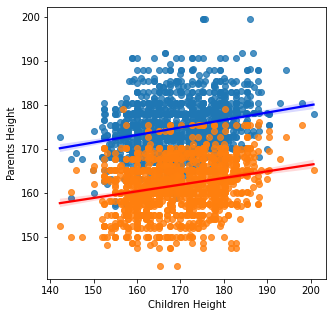

In [ ]:
plt.figure(figsize=(5, 5))
sns.regplot(x='Height(cm)', y='Father(cm)', data=height_data, line_kws={'color': 'blue'})
sns.regplot(x='Height(cm)', y='mother(cm)', data=height_data, line_kws={'color': 'red'})
plt.xlabel("Children Height")
plt.ylabel("Parents Height")

### 부모 키에 따른 자녀 키. 파랑 - Father, 주황 - Mother

Text(0, 0.5, 'Children Height')

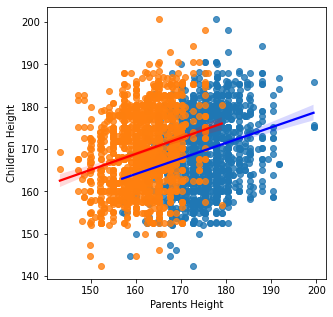

In [ ]:
plt.figure(figsize=(5, 5))
sns.regplot(x='Father(cm)', y='Height(cm)', data=height_data, line_kws={'color': 'blue'})
sns.regplot(x='mother(cm)', y='Height(cm)', data=height_data, line_kws={'color': 'red'})
plt.xlabel("Parents Height")
plt.ylabel("Children Height")

### 아빠키에 따른 자녀 키

Text(0, 0.5, 'Children Height')

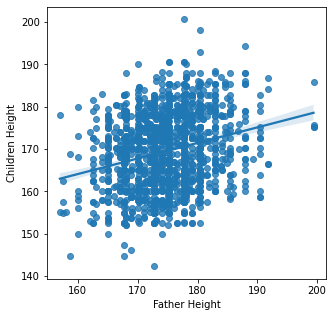

In [ ]:
plt.figure(figsize=(5, 5))
sns.regplot(x='Father(cm)', y='Height(cm)', data=height_data)
plt.xlabel("Father Height")
plt.ylabel("Children Height")

### 엄마키에 따른 자녀 키

Text(0, 0.5, 'Children Height')

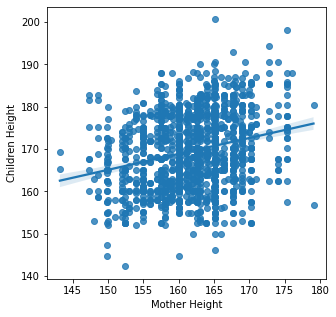

In [ ]:
plt.figure(figsize=(5, 5))
sns.regplot(x='mother(cm)', y='Height(cm)', data=height_data)
plt.xlabel("Mother Height")
plt.ylabel("Children Height")

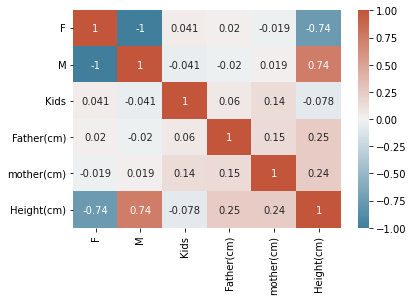

In [ ]:
corr = height_data.corr()
corr['Height(cm)']
sns.heatmap(corr, cmap=sns.diverging_palette(230, 20, as_cmap=True), annot=True)

In [11]:
dauter_height = height_data[height_data['F'] == 1]
dauter_height

,F,M,Kids,Father(cm),mother(cm),Height(cm)
5,1,0,3,172.00,163.00,173.00
6,1,0,3,172.00,163.00,168.50
11,1,0,2,168.00,158.00,153.60
12,1,0,2,168.00,158.00,152.00
14,1,0,2,168.00,155.00,161.00
...,...,...,...,...,...,...
1478,1,0,3,157.48,167.64,154.94
1480,1,0,2,158.75,160.02,144.78
1486,1,0,8,173.99,165.10,162.56
1487,1,0,8,173.99,165.10,161.29


Text(0, 0.5, 'Dauter Height')

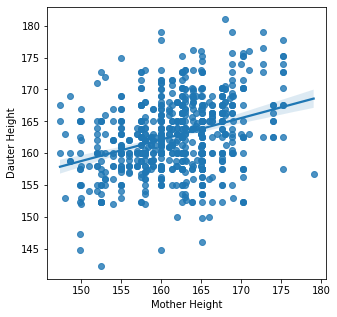

In [ ]:
# 엄마와 딸
plt.figure(figsize=(5, 5))
sns.regplot(x='mother(cm)', y='Height(cm)', data=height_data[height_data['F'] == 1])
plt.xlabel("Mother Height")
plt.ylabel("Dauter Height")

Text(0, 0.5, 'Son Height')

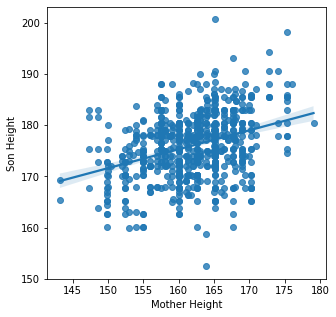

In [ ]:
# 엄마와 아들
plt.figure(figsize=(5, 5))
sns.regplot(x='mother(cm)', y='Height(cm)', data=height_data[height_data['M'] == 1])
plt.xlabel("Mother Height")
plt.ylabel("Son Height")

Text(0, 0.5, 'Dauter Height')

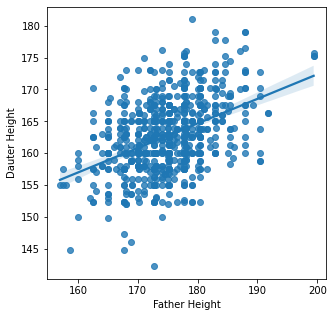

In [ ]:
# 아버지와 딸
plt.figure(figsize=(5, 5))
sns.regplot(x='Father(cm)', y='Height(cm)', data=height_data[height_data['F'] == 1])
plt.xlabel("Father Height")
plt.ylabel("Dauter Height")

Text(0, 0.5, 'Son Height')

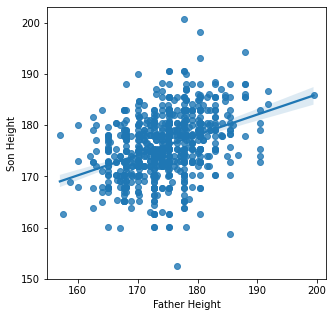

In [ ]:
# 아버지와 아들
plt.figure(figsize=(5, 5))
sns.regplot(x='Father(cm)', y='Height(cm)', data=height_data[height_data['M'] == 1])
plt.xlabel("Father Height")
plt.ylabel("Son Height")

## Data preparation

독립변수 종속변수 분리

In [12]:
X = pd.DataFrame(height_data.iloc[:,:5])
y = pd.DataFrame(height_data['Height(cm)'])

Train data와 Test data 분리

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Multiple Linear Regression

In [18]:
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(X_train, y_train)

y_predict = mlr.predict(X_test)

In [19]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 결정계수
r2 = r2_score(y_test, y_predict)
# 평균제곱오차
mse = mean_squared_error(y_test, y_predict)
# 평균제곱오차 제곱근
rmse = np.sqrt((mean_squared_error(y_test, y_predict)))
print("R2 : {0: .4f}, MSE : {1: .4f}, RMSE : {2: .4f}".format(r2, mse, rmse))

R2 :  0.6718, MSE :  24.7175, RMSE :  4.9717


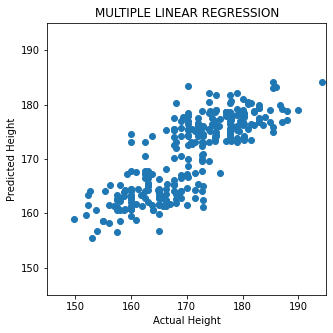

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))
plt.scatter(y_test, y_predict)
plt.xlabel("Actual Height")
plt.ylabel("Predicted Height")
plt.xlim([145,195])
plt.ylim([145,195])
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

## Baysian Regression

In [ ]:
from sklearn.linear_model import BayesianRidge

bayesian = BayesianRidge()
bayesian.fit(X_train, y_train) 

y_predict_ = bayesian.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# 결정계수
r2 = r2_score(y_test, y_predict)
# 평균제곱오차
mse = mean_squared_error(y_test, y_predict)
# 평균제곱오차 제곱근
rmse = np.sqrt((mean_squared_error(y_test, y_predict)))
print("R2 : {0: .4f}, MSE : {1: .4f}, RMSE : {2: .4f}".format(r2, mse, rmse))

R2 :  0.6718, MSE :  24.7175, RMSE :  4.9717


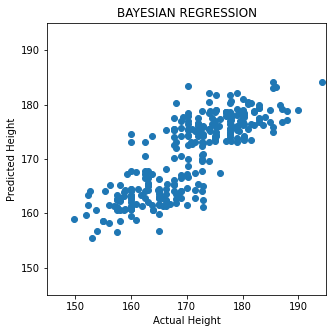

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))
plt.scatter(y_test, y_predict)
plt.xlabel("Actual Height")
plt.ylabel("Predicted Height")
plt.xlim([145,195])
plt.ylim([145,195])
plt.title("BAYESIAN REGRESSION")
plt.show()

## SVR

In [14]:
from sklearn.preprocessing import StandardScaler

# 표준정규분포로 정규화
sc_X = StandardScaler()
sc_y = StandardScaler()
sc_Xt = StandardScaler()
X_train_sc = sc_X.fit_transform(X_train)
y_train_sc = sc_y.fit_transform(y_train)
X_test_sc = sc_Xt.fit_transform(X_test)

In [15]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train_sc, y_train_sc)

y_pred = regressor.predict(X_test_sc)
# y_pred 결과를 원래 분포로 복원
y_pred = sc_y.inverse_transform(y_pred.reshape(-1, 1))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
# 결정계수
r2 = r2_score(y_test, y_pred)
# 평균제곱오차
mse = mean_squared_error(y_test, y_pred)
# 평균제곱오차 제곱근
rmse = np.sqrt((mean_squared_error(y_test, y_pred)))
print("R2 : {0: .4f}, MSE : {1: .4f}, RMSE : {2: .4f}".format(r2, mse, rmse))

R2 :  0.6428, MSE :  26.9003, RMSE :  5.1866


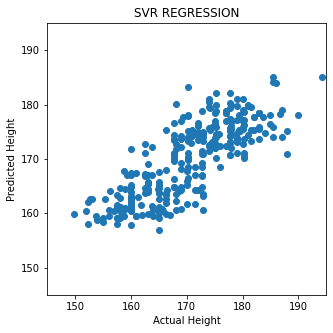

In [ ]:
plt.figure(figsize=(5, 5))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Height")
plt.ylabel("Predicted Height")
plt.xlim([145,195])
plt.ylim([145,195])
plt.title("SVR REGRESSION")
plt.show()

## MLP with SGD

In [21]:
from sklearn.preprocessing import StandardScaler

# 표준정규분포로 정규화
sc_X = StandardScaler()
sc_y = StandardScaler()
sc_Xt = StandardScaler()
X_train_sc = sc_X.fit_transform(X_train)
y_train_sc = sc_y.fit_transform(y_train)
X_test_sc = sc_Xt.fit_transform(X_test)

In [40]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=(10,10,10), activation='relu', solver='adam', random_state=0, alpha=0.001, learning_rate_init=0.02, max_iter=500)
mlp.fit(X_train_sc, y_train_sc)

y_pred = mlp.predict(X_test_sc)
# y_pred 결과를 원래 분포로 복원
y_pred = sc_y.inverse_transform(y_pred.reshape(-1, 1))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [41]:
# 결정계수
r2 = r2_score(y_test, y_pred)
# 평균제곱오차
mse = mean_squared_error(y_test, y_pred)
# 평균제곱오차 제곱근
rmse = np.sqrt((mean_squared_error(y_test, y_pred)))
print("R2 : {0: .4f}, MSE : {1: .4f}, RMSE : {2: .4f}".format(r2, mse, rmse))

R2 :  0.6570, MSE :  25.8330, RMSE :  5.0826


'sgd' random_state=0, alpha=0.01, learning_rate_init=0.1, max_iter=200 

 R2 :  0.6459, MSE :  26.6726, RMSE :  5.1646

'sgd' random_state=0, alpha=0.001, learning_rate_init=0.01, max_iter=200 

 R2 :  0.6425, MSE :  26.9248, RMSE :  5.1889

'sgd' random_state=0, alpha=0.01, learning_rate_init=0.15, max_iter=200 

 R2 :  0.6457, MSE :  26.6833, RMSE :  5.1656

## 'sgd' random_state=0, alpha=0.01, learning_rate_init=0.2, max_iter=200 

## R2 :  0.6491, MSE :  26.4290, RMSE :  5.1409

'sgd' random_state=0, alpha=0.01, learning_rate_init=0.3, max_iter=200 

R2 :  0.6481, MSE :  26.5070, RMSE :  5.1485

## 'adam' random_state=0, alpha=0.01, learning_rate_init=0.2, max_iter=200 -> 바꿔도 결과 동일

## R2 :  0.6570, MSE :  25.8330, RMSE :  5.0826




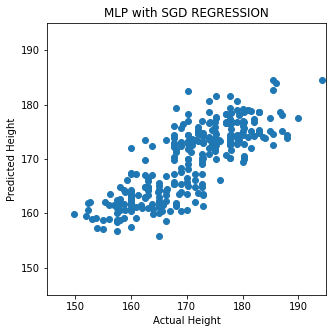

In [ ]:
plt.figure(figsize=(5, 5))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Height")
plt.ylabel("Predicted Height")
plt.xlim([145,195])
plt.ylim([145,195])
plt.title("MLP with SGD REGRESSION")
plt.show()

## Ridge

In [ ]:
from sklearn.linear_model import Ridge, RidgeCV

In [ ]:
alphas = [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1, 3, 10, 50, 100]

for a in alphas:
    model = Ridge(alpha=a).fit(X_train, y_train)
    score = model.score(X_train, y_train)
    pred_y = model.predict(X_train)
    mse = mean_squared_error(y_train, pred_y)
    print("Alpha:{0:.4f}, R2:{1:.4f}, MSE:{2:.4f}, RMSE:{3:.4f}".format(a, score, mse, np.sqrt(mse)))

ridge_cv = RidgeCV(alphas=alphas, cv=5)
model = ridge_cv.fit(X_train, y_train)
print(model.alpha_)

Alpha:0.0001, R2:0.6657, MSE:26.8562, RMSE:5.1823
Alpha:0.0010, R2:0.6657, MSE:26.8562, RMSE:5.1823
Alpha:0.0100, R2:0.6657, MSE:26.8562, RMSE:5.1823
Alpha:0.1000, R2:0.6657, MSE:26.8562, RMSE:5.1823
Alpha:0.3000, R2:0.6657, MSE:26.8562, RMSE:5.1823
Alpha:0.5000, R2:0.6657, MSE:26.8562, RMSE:5.1823
Alpha:0.7000, R2:0.6657, MSE:26.8562, RMSE:5.1823
Alpha:1.0000, R2:0.6657, MSE:26.8563, RMSE:5.1823
Alpha:3.0000, R2:0.6657, MSE:26.8573, RMSE:5.1824
Alpha:10.0000, R2:0.6655, MSE:26.8680, RMSE:5.1834
Alpha:50.0000, R2:0.6625, MSE:27.1161, RMSE:5.2073
Alpha:100.0000, R2:0.6546, MSE:27.7512, RMSE:5.2679
1.0


In [ ]:
model_ridge = Ridge(alpha=1.0).fit(X_train, y_train)
y_pred = model_ridge.predict(X_test)
score_ridge = model_ridge.score(X_test, y_test)
mse_ridge = mean_squared_error(y_test, y_pred)
print("R2 : {0:.4f}, MSE : {1:.4f}, RMSE : {2:.4f}".format(score_ridge, mse_ridge, np.sqrt(mse_ridge)))

R2 : 0.6707, MSE : 24.8031, RMSE : 4.9803


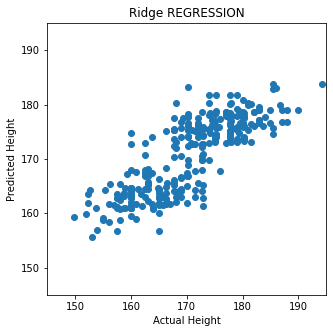

In [ ]:
plt.figure(figsize=(5, 5))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Height")
plt.ylabel("Predicted Height")
plt.xlim([145,195])
plt.ylim([145,195])
plt.title("Ridge REGRESSION")
plt.show()

## Lasso

In [ ]:
from sklearn.linear_model import Lasso, LassoCV

for a in alphas:
    model = Lasso(alpha=a).fit(X_train, y_train.to_numpy().ravel())
    score = model.score(X_train, y_train)
    pred_y = model.predict(X_train)
    mse = mean_squared_error(y_train, pred_y)
    print("Alpha:{0:.4f}, R2:{1:.4f}, MSE:{2:.4f}, RMSE:{3:.4f}".format(a, score, mse, np.sqrt(mse)))

lasso_cv = LassoCV(alphas=alphas, cv=5)
model = lasso_cv.fit(X_train, y_train.to_numpy().ravel())
print(model.alpha_)

Alpha:0.0001, R2:0.6657, MSE:26.8562, RMSE:5.1823
Alpha:0.0010, R2:0.6657, MSE:26.8562, RMSE:5.1823
Alpha:0.0100, R2:0.6657, MSE:26.8566, RMSE:5.1823
Alpha:0.1000, R2:0.6652, MSE:26.8973, RMSE:5.1863
Alpha:0.3000, R2:0.6611, MSE:27.2264, RMSE:5.2179
Alpha:0.5000, R2:0.6529, MSE:27.8845, RMSE:5.2806
Alpha:0.7000, R2:0.6406, MSE:28.8717, RMSE:5.3732
Alpha:1.0000, R2:0.6145, MSE:30.9695, RMSE:5.5650
Alpha:3.0000, R2:0.2049, MSE:63.8757, RMSE:7.9922
Alpha:10.0000, R2:0.0505, MSE:76.2746, RMSE:8.7335
Alpha:50.0000, R2:0.0000, MSE:80.3344, RMSE:8.9629
Alpha:100.0000, R2:0.0000, MSE:80.3344, RMSE:8.9629
0.01


In [ ]:
model_lasso = Lasso(alpha=0.01).fit(X_train, y_train)
y_pred = model_lasso.predict(X_test)
score_lasso = model_lasso.score(X_test, y_test)
mse_lasso = mean_squared_error(y_test, y_pred)
print("R2 : {0:.4f}, MSE : {1:.4f}, RMSE : {2:.4f}".format(score_lasso, mse_lasso, np.sqrt(mse_lasso)))

R2 : 0.6706, MSE : 24.8061, RMSE : 4.9806


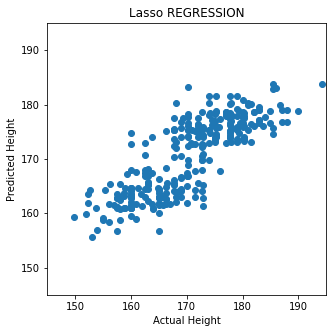

In [ ]:
plt.figure(figsize=(5, 5))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Height")
plt.ylabel("Predicted Height")
plt.xlim([145,195])
plt.ylim([145,195])
plt.title("Lasso REGRESSION")
plt.show()

## Elastic

In [ ]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

for a in alphas:
    model = ElasticNet(alpha=a).fit(X_train, y_train.to_numpy().ravel())
    score = model.score(X_train, y_train.to_numpy().ravel())
    pred_y = model.predict(X_train)
    mse = mean_squared_error(y_train.to_numpy().ravel(), pred_y)
    print("Alpha:{0:.4f}, R2:{1:.4f}, MSE:{2:.4f}, RMSE:{3:.4f}".format(a, score, mse, np.sqrt(mse)))

elastic_cv = ElasticNetCV(alphas=alphas, cv=5)
model = elastic_cv.fit(X_train, y_train.to_numpy().ravel())
print(model.alpha_)

Alpha:0.0001, R2:0.6657, MSE:26.8562, RMSE:5.1823
Alpha:0.0010, R2:0.6657, MSE:26.8562, RMSE:5.1823
Alpha:0.0100, R2:0.6656, MSE:26.8618, RMSE:5.1828
Alpha:0.1000, R2:0.6598, MSE:27.3305, RMSE:5.2279
Alpha:0.3000, R2:0.6277, MSE:29.9118, RMSE:5.4692
Alpha:0.5000, R2:0.5863, MSE:33.2316, RMSE:5.7647
Alpha:0.7000, R2:0.5446, MSE:36.5876, RMSE:6.0488
Alpha:1.0000, R2:0.4869, MSE:41.2171, RMSE:6.4201
Alpha:3.0000, R2:0.2585, MSE:59.5672, RMSE:7.7180
Alpha:10.0000, R2:0.0906, MSE:73.0531, RMSE:8.5471
Alpha:50.0000, R2:0.0000, MSE:80.3344, RMSE:8.9629
Alpha:100.0000, R2:0.0000, MSE:80.3344, RMSE:8.9629
0.001


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.217e+04, tolerance: 9.568e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [ ]:
model_elastic = ElasticNet(alpha=0.001).fit(X_train, y_train)
y_pred_elastic = model_elastic.predict(X_test)
score_elastic = model_elastic.score(X_test, y_test)
mse_elastic = mean_squared_error(y_test, y_pred_elastic)
print("R2 : {0:.4f}, MSE : {1:.4f}, RMSE : {2:.4f}".format(score_elastic, mse_elastic, np.sqrt(mse_elastic)))

R2 : 0.6707, MSE : 24.8015, RMSE : 4.9801


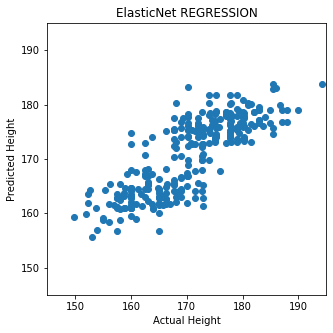

In [ ]:
plt.figure(figsize=(5, 5))
plt.scatter(y_test, y_pred_elastic)
plt.xlabel("Actual Height")
plt.ylabel("Predicted Height")
plt.xlim([145,195])
plt.ylim([145,195])
plt.title("ElasticNet REGRESSION")
plt.show()

## AdaBoost

In [ ]:
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor(random_state=0)
grid_param={'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 1], 'n_estimators':[100, 200, 300, 400]}
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

In [ ]:
grid_search = GridSearchCV(ada, param_grid=grid_param, cv=kfold, scoring='r2', refit=True).fit(X_train, y_train.to_numpy().ravel())
y_pred = grid_search.best_estimator_.predict(X_test)

In [ ]:
score = r2_score(y_test, y_pred)
mse= mean_squared_error(y_test, y_pred)
print("R2 : {0:.4f}, MSE : {1:.4f}, RMSE : {2:.4f}".format(score, mse, np.sqrt(mse)))

R2 : 0.6516, MSE : 26.2379, RMSE : 5.1223


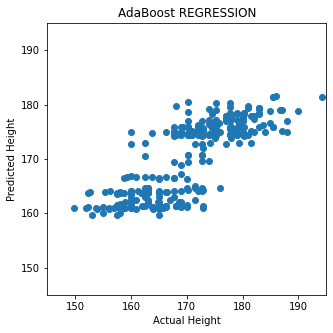

In [ ]:
plt.figure(figsize=(5, 5))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Height")
plt.ylabel("Predicted Height")
plt.xlim([145,195])
plt.ylim([145,195])
plt.title("AdaBoost REGRESSION")
plt.show()

## XGBoost

In [ ]:
import xgboost

xgb = xgboost.XGBRegressor(random_state=0, objective = 'reg:squarederror')
xgb.fit(X_train, y_train.to_numpy().ravel())
y_pred = xgb.predict(X_test)

In [ ]:
score = r2_score(y_test, y_pred)
mse= mean_squared_error(y_test, y_pred)
print("R2 : {0:.4f}, MSE : {1:.4f}, RMSE : {2:.4f}".format(score, mse, np.sqrt(mse)))

R2 : 0.6834, MSE : 23.8458, RMSE : 4.8832


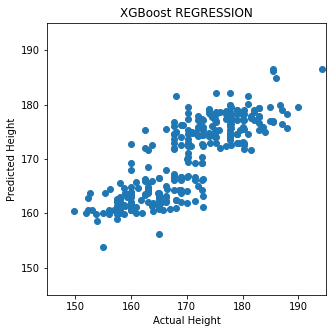

In [ ]:
plt.figure(figsize=(5, 5))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Height")
plt.ylabel("Predicted Height")
plt.xlim([145,195])
plt.ylim([145,195])
plt.title("XGBoost REGRESSION")
plt.show()

## LightGBM

In [ ]:
import lightgbm as lgb

lgbmreg = lgb.LGBMRegressor(random_state=0)
lgbmreg.fit(X_train, y_train.to_numpy().ravel())
y_pred = lgbmreg.predict(X_test)

In [ ]:
score = r2_score(y_test, y_pred)
mse= mean_squared_error(y_test, y_pred)
print("R2 : {0:.4f}, MSE : {1:.4f}, RMSE : {2:.4f}".format(score, mse, np.sqrt(mse)))

R2 : 0.6610, MSE : 25.5298, RMSE : 5.0527


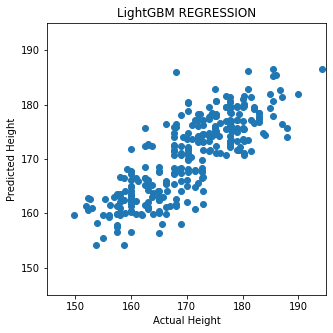

In [ ]:
plt.figure(figsize=(5, 5))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Height")
plt.ylabel("Predicted Height")
plt.xlim([145,195])
plt.ylim([145,195])
plt.title("LightGBM REGRESSION")
plt.show()

## CatBoost

In [ ]:
from catboost import CatBoostRegressor, Pool, cv

# model = CatBoostRegressor(iterations=1000, learning_rate=1, loss_function='RMSE')
model = CatBoostRegressor(iterations=50, loss_function='RMSE')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

Learning rate set to 0.480741
0:	learn: 6.9489489	total: 381us	remaining: 18.7ms
1:	learn: 5.8663304	total: 3.45ms	remaining: 82.7ms
2:	learn: 5.4483541	total: 4.35ms	remaining: 68.1ms
3:	learn: 5.2082230	total: 5.61ms	remaining: 64.5ms
4:	learn: 5.1246485	total: 6.97ms	remaining: 62.8ms
5:	learn: 5.0754028	total: 8.17ms	remaining: 59.9ms
6:	learn: 5.0329347	total: 9.49ms	remaining: 58.3ms
7:	learn: 4.9878091	total: 11ms	remaining: 57.7ms
8:	learn: 4.9563024	total: 12.4ms	remaining: 56.7ms
9:	learn: 4.9336643	total: 13.8ms	remaining: 55.4ms
10:	learn: 4.9222376	total: 15.2ms	remaining: 53.8ms
11:	learn: 4.8953905	total: 16.5ms	remaining: 52.2ms
12:	learn: 4.8895286	total: 18ms	remaining: 51.1ms
13:	learn: 4.8780217	total: 19ms	remaining: 48.8ms
14:	learn: 4.8549909	total: 20.4ms	remaining: 47.7ms
15:	learn: 4.8149437	total: 22.2ms	remaining: 47.2ms
16:	learn: 4.8042805	total: 23.7ms	remaining: 45.9ms
17:	learn: 4.7993534	total: 25.2ms	remaining: 44.8ms
18:	learn: 4.7813817	total: 26.7m

In [ ]:
score = r2_score(y_test, y_pred)
mse= mean_squared_error(y_test, y_pred)
print("R2 : {0:.4f}, MSE : {1:.4f}, RMSE : {2:.4f}".format(score, mse, np.sqrt(mse)))

R2 : 0.6719, MSE : 24.7095, RMSE : 4.9709


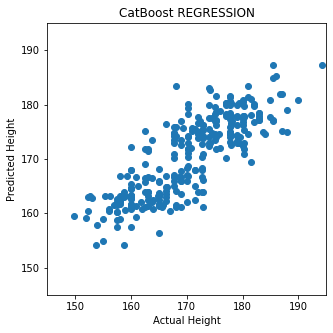

In [ ]:
plt.figure(figsize=(5, 5))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Height")
plt.ylabel("Predicted Height")
plt.xlim([145,195])
plt.ylim([145,195])
plt.title("CatBoost REGRESSION")
plt.show()